# Movie Trends Analysis

This notebook explores temporal patterns in the TMDb movies dataset, including genre evolution, rating trends, release patterns, and correlations.

**Dataset Source:** [`tmdb_movies.csv`](../tmdb_movies.csv)

**Last Updated:** August 11, 2025

**Objectives:**
- Analyze genre popularity over decades
- Examine rating trends across time periods
- Study movie release patterns by year
- Investigate industry growth and patterns
- Perform correlation studies between metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import os, sys
sys.path.insert(0, os.getcwd()+"/..")
import importlib
import tmdb_scraper
importlib.reload(tmdb_scraper)

# Set styles
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load and Prepare Data

In [2]:
df = pd.read_csv('../tmdb_movies.csv')

# Convert Year to integer, handle missing
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df = df.dropna(subset=['Year'])

# Create Decade column
df['Decade'] = (df['Year'] // 10) * 10

df.head()

,Title,Year,Rating,Description,Genre,Decade
0,War of the Worlds,2025,4.375,Will Radford is a top analyst for Homeland Sec...,"Science Fiction, Thriller",2020
1,Jurassic World Rebirth,2025,6.411,Five years after the events of Jurassic World ...,"Science Fiction, Adventure, Action",2020
2,Tuhog,2023,4.400,Abie mourns after the death of Michael. She fi...,"Drama, Romance",2020
3,The Pickup,2025,6.640,A routine cash pickup takes a wild turn when m...,"Action, Comedy, Crime",2020
4,Creation of the Gods II: Demon Force,2025,6.282,Taishi Wen Zhong led the army of Shang Dynasty...,"Action, Fantasy, War",2020


## Genre Popularity Evolution Across Decades

In [3]:
# Explode genres
df_genres = df.copy()
df_genres['Genre'] = df_genres['Genre'].str.split(',')
df_genres = df_genres.explode('Genre')
df_genres['Genre'] = df_genres['Genre'].str.strip()

# Group by decade and genre
genre_decade = df_genres.groupby(['Decade', 'Genre']).size().reset_index(name='Count')

# Top genres per decade
top_genres = genre_decade.groupby('Decade').apply(lambda x: x.nlargest(5, 'Count'), include_groups=False).reset_index(drop=True)

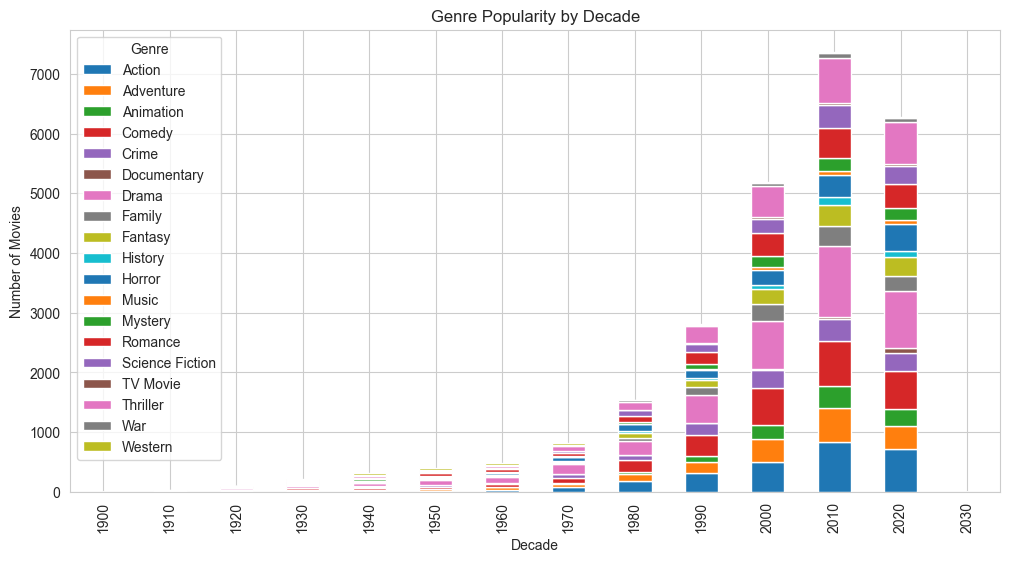

In [4]:
# Stacked bar plot
pivot = genre_decade.pivot(index='Decade', columns='Genre', values='Count').fillna(0)
pivot.plot(kind='bar', stacked=True)
plt.title('Genre Popularity by Decade')
plt.ylabel('Number of Movies')
plt.show()

## Rating Trends Over Time Periods

In [5]:
# Average rating by year
rating_year = df.groupby('Year')['Rating'].mean().reset_index()

# Average rating by decade
rating_decade = df.groupby('Decade')['Rating'].mean().reset_index()

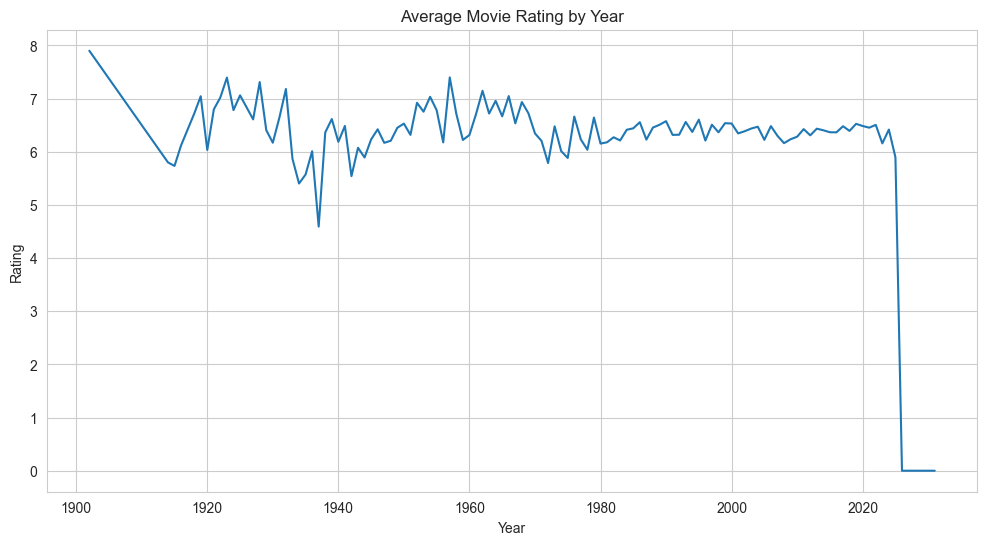

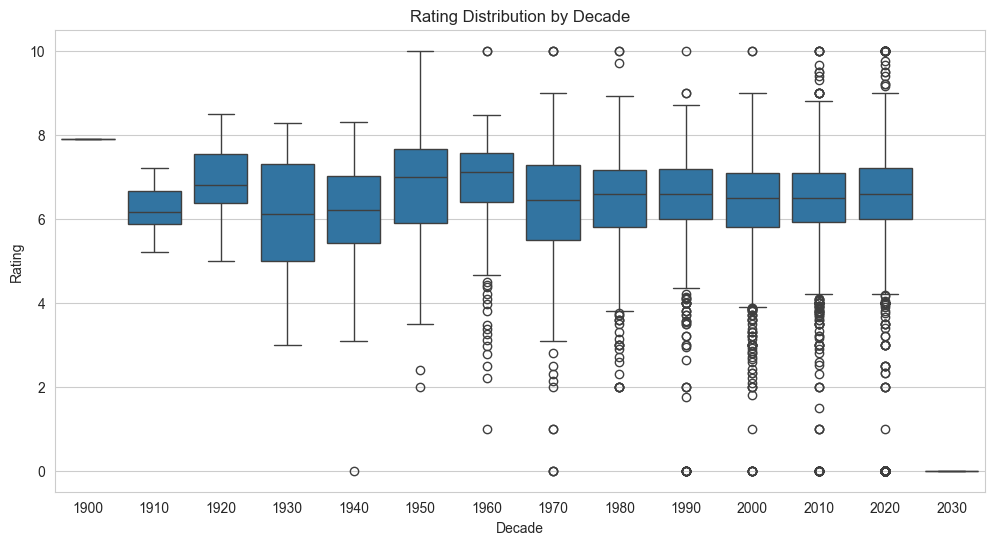

In [6]:
# Line plot for yearly trends
sns.lineplot(data=rating_year, x='Year', y='Rating')
plt.title('Average Movie Rating by Year')
plt.show()

# Box plot for decades
sns.boxplot(data=df, x='Decade', y='Rating')
plt.title('Rating Distribution by Decade')
plt.show()

## Movie Release Patterns by Year

In [7]:
# Releases per year
releases_year = df['Year'].value_counts().sort_index().reset_index()
releases_year.columns = ['Year', 'Count']

# Releases per decade
releases_decade = df['Decade'].value_counts().sort_index().reset_index()
releases_decade.columns = ['Decade', 'Count']

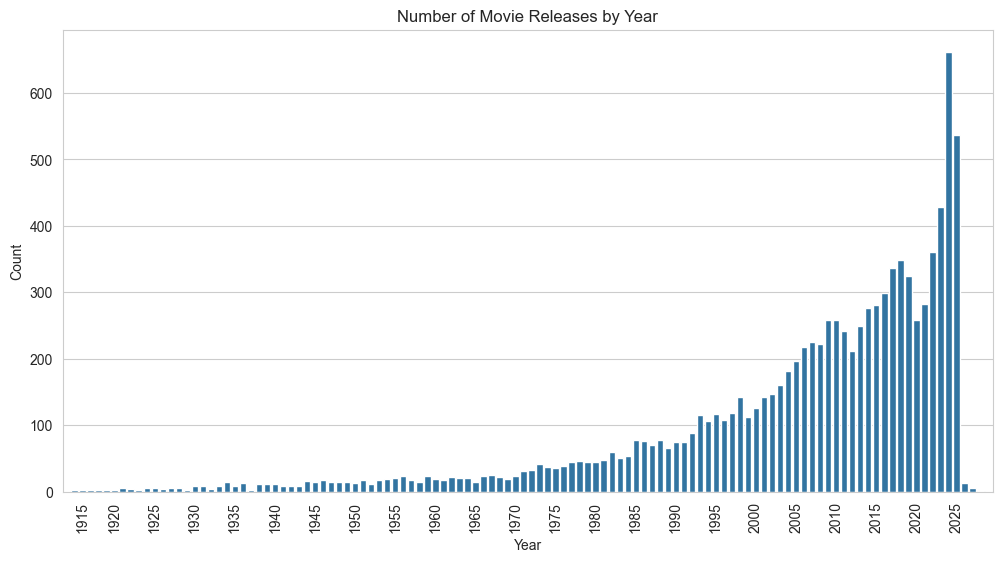

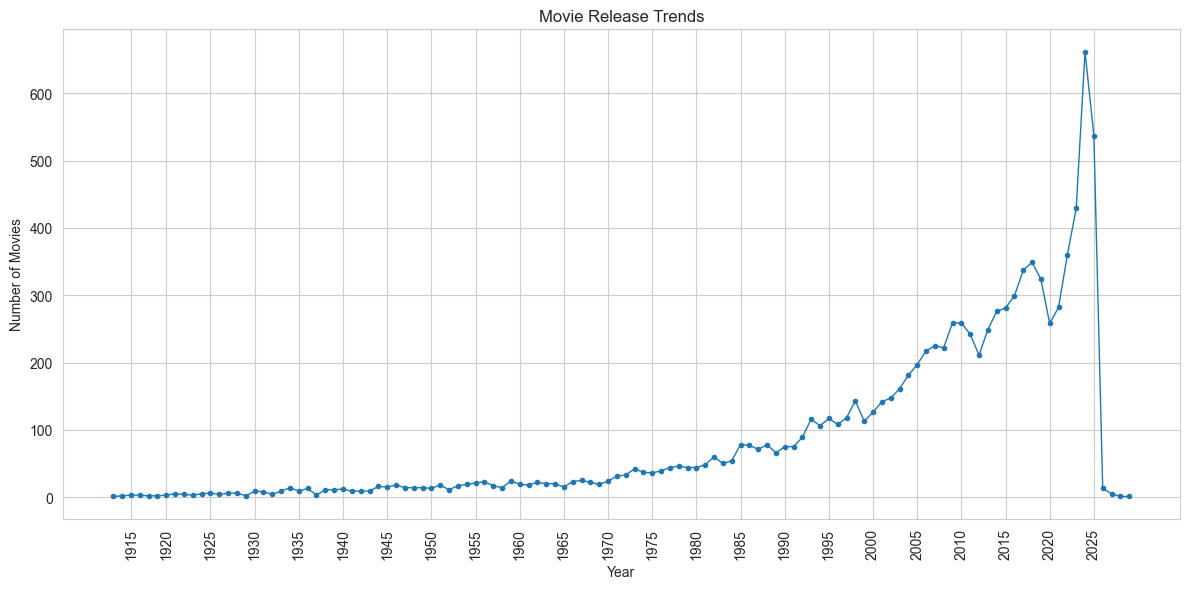

In [8]:
# Convert Year to string for categorical axis
releases_year['Year'] = releases_year['Year'].astype(str)

# Plot the barplot
ax = sns.barplot(data=releases_year, x='Year', y='Count')

# Set title
ax.set_title('Number of Movie Releases by Year')

# Select years to show on x-axis (every 5th year)
all_years = releases_year['Year'].tolist()
# This generates years like '1905', '1910', ... as strings every 5 years
ticks_to_show = [year for year in all_years if int(year) % 5 == 0]

# Get positions (indices) of these years in the categorical x-axis
positions = [all_years.index(year) for year in ticks_to_show]

# Set the x-ticks and labels on positions with rotation
ax.set_xticks(positions)
ax.set_xticklabels(ticks_to_show, rotation=90)

plt.show()


# Static line plot for trend
plt.figure(figsize=(12,6))
plt.plot(releases_year['Year'], releases_year['Count'], marker='o', markersize=3, linewidth=1)
plt.title('Movie Release Trends')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(ticks=positions, labels=ticks_to_show, rotation=90)
plt.tight_layout()
plt.show()


## Industry Growth and Pattern Analysis

The release patterns show industry growth, with increasing numbers of movies over time. Potential seasonal patterns could be explored if month data was available, but based on years, we see exponential growth in recent decades.

## Correlation Studies Between Metrics

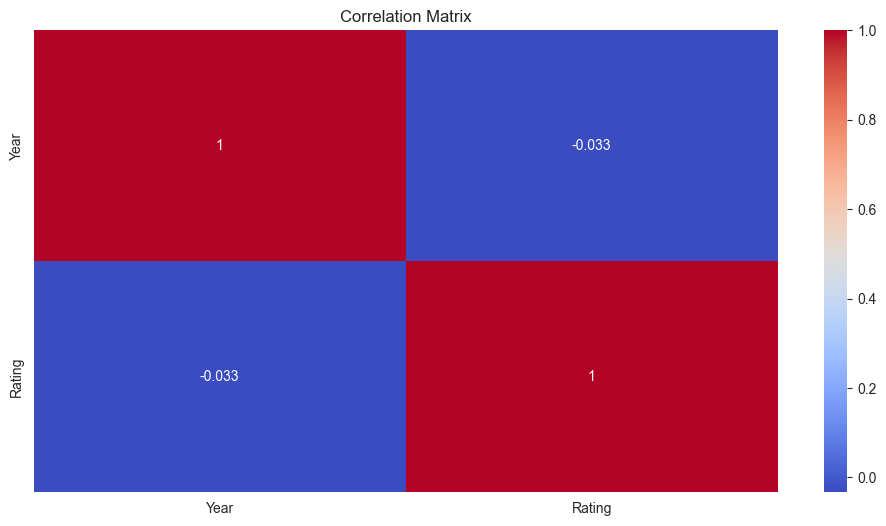

In [9]:
# Numeric correlations
corr = df[['Year', 'Rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

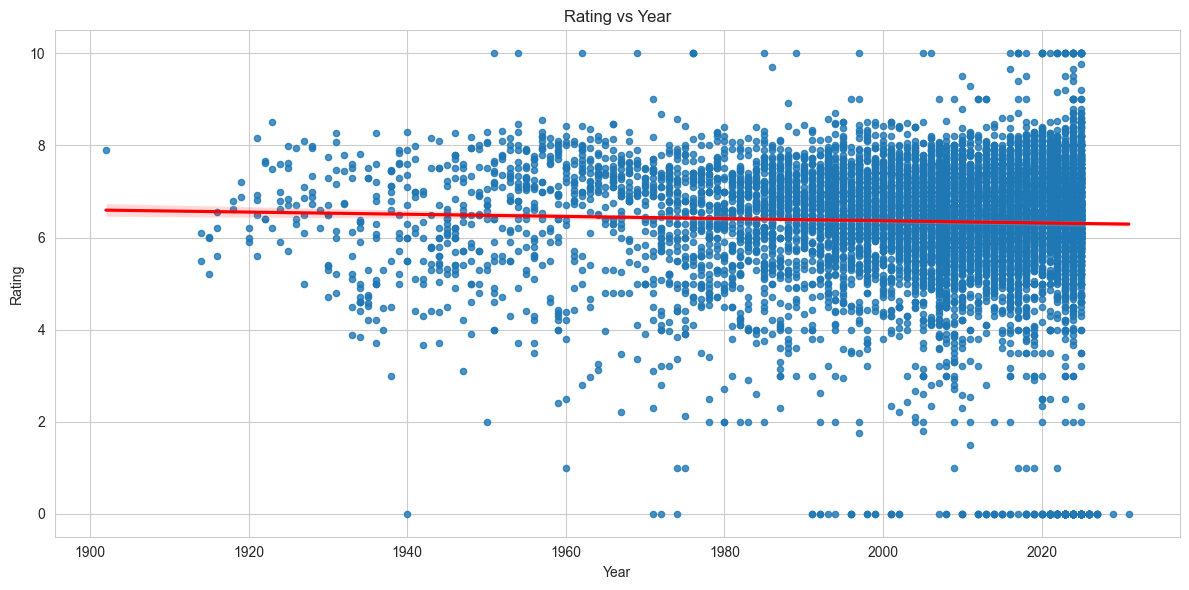

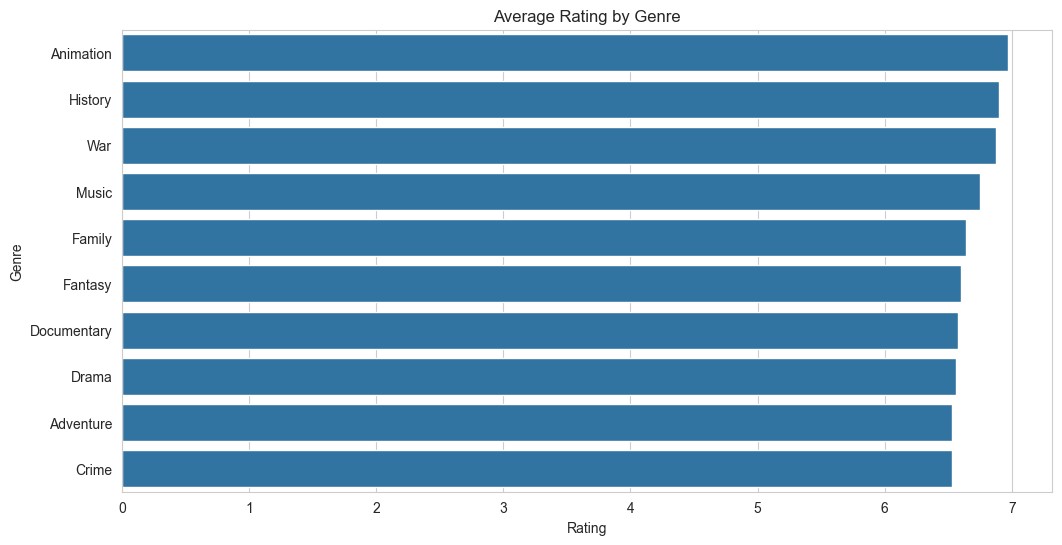

In [10]:
# Scatter plot
plt.figure(figsize=(12,6))
sns.regplot(data=df, x='Year', y='Rating', scatter_kws={'s':20}, line_kws={'color':'red'})
plt.title('Rating vs Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# Genre vs Rating (average)
genre_rating = df_genres.groupby('Genre')['Rating'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=genre_rating.head(10), x='Rating', y='Genre')
plt.title('Average Rating by Genre')
plt.show()

In [11]:
from IPython.display import Markdown, display

df = pd.read_csv("../tmdb_movies.csv")

target_movies = tmdb_scraper.target_movies

text = f"""
## **Key Insights**
- Movie releases have increased significantly in recent years.
- Ratings show {'slight decrease' if corr.iloc[0,1] < 0 else 'slight increase'} over time.
- Popular genres evolve, with modern decades showing more diversity.
"""

display(Markdown(text))

if len(df) < target_movies:
    display(Markdown(f"#### ⚠️ **NOTE: {target_movies - len(df)} movie(s) skipped due to API limits.**\n")) 


## **Key Insights**
- Movie releases have increased significantly in recent years.
- Ratings show slight decrease over time.
- Popular genres evolve, with modern decades showing more diversity.


#### ⚠️ **NOTE: 1 movie(s) skipped due to API limits.**



---

<div align="center">
    <p>
        <a href="https://raw.githubusercontent.com/HERALDEXX/tmdb-movie-scraper/refs/heads/main/LICENSE" target="_blank">
            <img src="https://img.shields.io/badge/License-MIT-yellow.svg?style=flat-square" alt="Click to View MIT License" style="vertical-align: middle;" />
        </a> <strong style="font-weight: bold;">• © 2025 Herald Inyang •</strong> 
        <a href="https://github.com/HERALDEXX" target="_blank">
            <img src="https://img.shields.io/badge/GitHub-HERALDEXX-000?style=flat-square&logo=github" alt="GitHub Badge" style="vertical-align: middle;" />
        </a>
    </p>
</div>

---
